### 한겨레일보 데이터크롤러

```
Arguments : query_word, (period)

return : title_list, category_list, body_list
```

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
def body_extractor(link):
    
    soup = BeautifulSoup(requests.get(link).content, 'html.parser')
    category = soup.select_one(".category").text

    return category, soup.select_one("div.text").text.strip().replace("\n", "").replace("\r", "").replace("■", "").replace("▲", "")

def hankyerae_crawler(query, period=None):
    
    # data containers 
    titles = []
    links = []
    categories = []
    dates = []
    bodies = []
    
    i = 0 
    nobody = 0
    
    while True:
        try:
            print("-" * 30)
            print('{} page is start'.format(i))

            url = "http://search.hani.co.kr/Search?command=query&keyword={}&media=news&sort=d&period=all&datefrom=2000.01.01&dateto=2019.06.05&pageseq={}".format(query, i)
            res = requests.get(url)
            soup = BeautifulSoup(res.content, 'html.parser')

            if len(soup.select(".search-none")) != 0:
                print('***** no result! *****')
                break

            for art, da in zip(soup.select("dt > a"), soup.select(".date > dl > dd")):

                title = art.text
                if len(title) == 0:
                    nobody += 1
                    continue

                link = art["href"]
                if len(link) == 0:
                    nobody += 1
                    continue

                date = da.text
                if len(date) == 0:
                    date = "unknown_date"

                try:
                    category, body = body_extractor(link)
                    if len(body) == 0:
                        print("no body")
                        nobody += 1
                        continue
                    if len(category) == 0:
                        category = 'unknown_category'

                except Exception as ex:
                    print(ex)
                    nobody += 1
                    continue

                titles.append(title)
                links.append(link)
                categories.append(category) 
                dates.append(date)
                bodies.append(body)

            print('{} page is done'.format(i+1))
            i += 1
        except:
            print("**"*30)
            print("wait.....")
            print("**"*30)
            sleep(5)
            continue

    return [titles, links, categories, dates, bodies], nobody

#### 미세먼지

In [3]:
data_dust, nobody_dust = hankyerae_crawler('미세먼지')

------------------------------
0 page is start
1 page is done
------------------------------
1 page is start
2 page is done
------------------------------
2 page is start
3 page is done
------------------------------
3 page is start
4 page is done
------------------------------
4 page is start
5 page is done
------------------------------
5 page is start
6 page is done
------------------------------
6 page is start
7 page is done
------------------------------
7 page is start
8 page is done
------------------------------
8 page is start
9 page is done
------------------------------
9 page is start
10 page is done
------------------------------
10 page is start
11 page is done
------------------------------
11 page is start
12 page is done
------------------------------
12 page is start
13 page is done
------------------------------
13 page is start
14 page is done
------------------------------
14 page is start
15 page is done
------------------------------
15 page is start
16 page is 

128 page is done
------------------------------
128 page is start
129 page is done
------------------------------
129 page is start
130 page is done
------------------------------
130 page is start
131 page is done
------------------------------
131 page is start
132 page is done
------------------------------
132 page is start
133 page is done
------------------------------
133 page is start
134 page is done
------------------------------
134 page is start
135 page is done
------------------------------
135 page is start
136 page is done
------------------------------
136 page is start
137 page is done
------------------------------
137 page is start
138 page is done
------------------------------
138 page is start
139 page is done
------------------------------
139 page is start
140 page is done
------------------------------
140 page is start
141 page is done
------------------------------
141 page is start
142 page is done
------------------------------
142 page is start
143 page i

253 page is done
------------------------------
253 page is start
254 page is done
------------------------------
254 page is start
255 page is done
------------------------------
255 page is start
256 page is done
------------------------------
256 page is start
257 page is done
------------------------------
257 page is start
258 page is done
------------------------------
258 page is start
259 page is done
------------------------------
259 page is start
260 page is done
------------------------------
260 page is start
261 page is done
------------------------------
261 page is start
262 page is done
------------------------------
262 page is start
263 page is done
------------------------------
263 page is start
264 page is done
------------------------------
264 page is start
265 page is done
------------------------------
265 page is start
266 page is done
------------------------------
266 page is start
267 page is done
------------------------------
267 page is start
268 page i

In [4]:
nobody_dust

0

In [5]:
import pandas as pd

df = pd.DataFrame()

df["title"] = data_dust[0]
df["link"] = data_dust[1]
df["category"] = data_dust[2]
df["date"] = data_dust[3]
df["body"] = data_dust[4]
df

,title,link,category,date,body
0,[날씨] 밤부터 전국 비…수도권·충청 오전 미세먼지 ‘나쁨’,http://www.hani.co.kr/arti/society/society_gen...,사회사회일반,2019.06.05 21:40,현충일이자 24절기 상 망종(芒種)인 6일은 전국에 가끔 구름이 많다가 낮부터 차차...
1,문재인 대통령 “4년내 미세먼지 30% 이상 줄이겠다”,http://www.hani.co.kr/arti/politics/bluehouse/...,정치청와대,2019.06.05 21:04,문재인 대통령이 5일 오후 경남 창원 컨벤션센터에서 환경의 날 기념식을 마친 뒤 수...
2,[ESC] 달리기를 느껴라! 러닝 기술 ABC,http://www.hani.co.kr/arti/specialsection/esc_...,ESC,2019.06.05 20:03,"지난달 29일, 서울 성수동 서울숲에서 ‘아디다스 러너스 서울’ 박성찬 코치가 달리..."
3,"“누진제 개편안, 원전·석탄발전 더 많이 가동하란 정책”",http://www.hani.co.kr/arti/economy/marketing/8...,경제산업·재계,2019.06.05 19:08,그래픽_김지야 정부의 가정용 전기요금 누진제 개편안은 “수요 관리를 기본으로 해야...
4,[날씨] 남부지방 낮기온 33도↑…전국 미세먼지 '보통'∼'나쁨',http://www.hani.co.kr/arti/society/environment...,사회환경,2019.06.05 00:29,수요일인 5일은 전국이 대체로 맑은 가운데 내륙 지역을 중심으로 낮 기온이 30도 ...
5,한강 품은 호텔 연계 오피스텔 ‘리버뷰 나루 하우스’ 눈길,http://www.hani.co.kr/arti/economy/property/89...,경제부동산,2019.06.04 17:37,리버뷰 나루 하우스 조감도 마포구 한강변 오피스텔 ‘리버뷰 나루 하우스’가 오는 ...
6,울산시-기업-NGO 함께 ‘미세먼지 저감 도시 숲' 조성,http://www.hani.co.kr/arti/area/yeongnam/89658...,전국영남,2019.06.04 14:53,"울산시는 4일 케이투코리아㈜, 세계자연기금 한국본부(WWF-Korea) 등과 '미세..."
7,235개 120만t…“헬프미” 전국은 쓰레기로 신음 중,http://www.hani.co.kr/arti/society/society_gen...,사회사회일반,2019.06.04 14:29,"류우종 기자무분별한 플라스틱 사용이 초래할 재앙에 대해 보통 ‘생산에 5초, 사용하..."
8,[날씨] 대구 낮 최고 34도 ‘무더위’…경기 일부 출근길 빗방울,http://www.hani.co.kr/arti/society/environment...,사회환경,2019.06.03 23:02,화요일인 4일 대구 낮 최고기온이 34도까지 오르는 등 무더위가 이어지는 가운데 경...
9,[날씨] 더위 속 경상내륙 폭염주의보…미세먼지 ‘보통’∼‘나쁨’,http://www.hani.co.kr/arti/society/society_gen...,사회사회일반,2019.06.03 00:05,6월 첫 월요일인 3일은 전국이 맑은 가운데 대구와 경상도 지역에 폭염주의보가 발효...


In [6]:
import pickle 

with open('hankyerae_dust.pkl', "wb") as f:
    pickle.dump(df, f)

In [7]:
with open('hankyerae_dust.pkl', "rb") as f:
    sla = pickle.load(f)

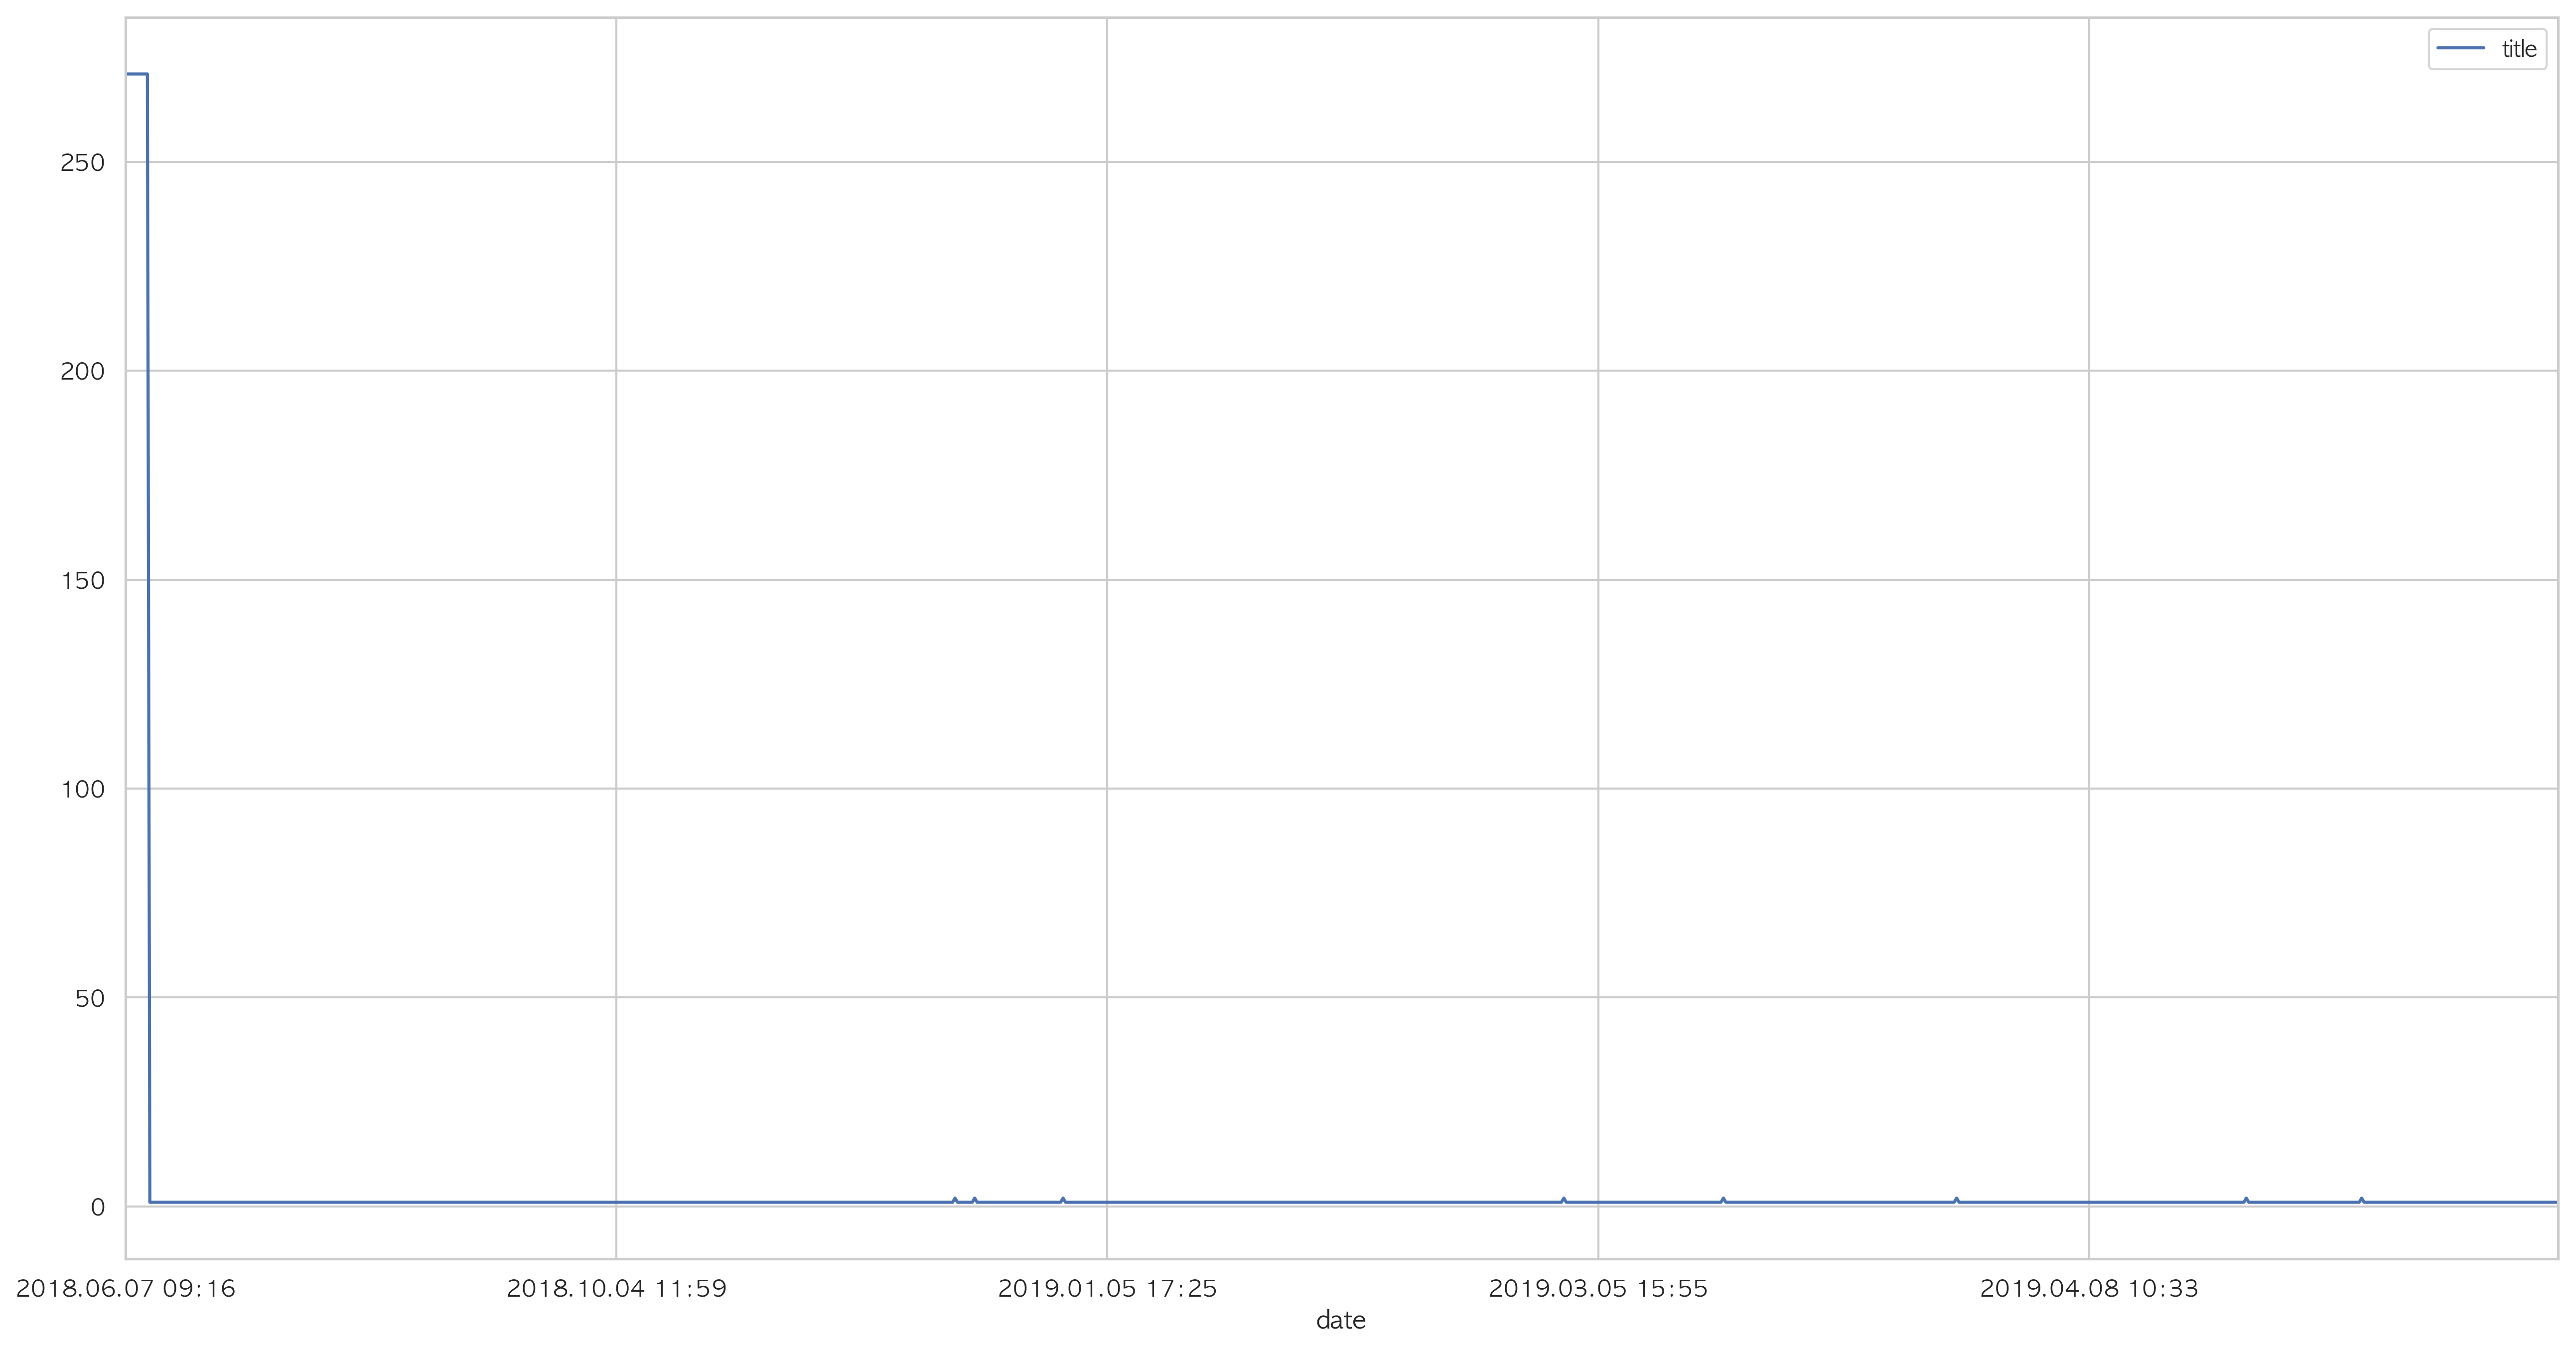

In [8]:
fig, ax = plt.subplots(1,1,figsize=(21, 11))
sla.groupby(by='date').count().plot(y="title", ax=ax)

#### 노인

In [9]:
data_elder, nobody_elder = hankyerae_crawler('미세먼지')

------------------------------
0 page is start
1 page is done
------------------------------
1 page is start
2 page is done
------------------------------
2 page is start
3 page is done
------------------------------
3 page is start
4 page is done
------------------------------
4 page is start
5 page is done
------------------------------
5 page is start
6 page is done
------------------------------
6 page is start
7 page is done
------------------------------
7 page is start
8 page is done
------------------------------
8 page is start
9 page is done
------------------------------
9 page is start
10 page is done
------------------------------
10 page is start
11 page is done
------------------------------
11 page is start
12 page is done
------------------------------
12 page is start
13 page is done
------------------------------
13 page is start
14 page is done
------------------------------
14 page is start
15 page is done
------------------------------
15 page is start
16 page is 

128 page is done
------------------------------
128 page is start
129 page is done
------------------------------
129 page is start
130 page is done
------------------------------
130 page is start
131 page is done
------------------------------
131 page is start
132 page is done
------------------------------
132 page is start
133 page is done
------------------------------
133 page is start
134 page is done
------------------------------
134 page is start
135 page is done
------------------------------
135 page is start
136 page is done
------------------------------
136 page is start
137 page is done
------------------------------
137 page is start
138 page is done
------------------------------
138 page is start
139 page is done
------------------------------
139 page is start
140 page is done
------------------------------
140 page is start
141 page is done
------------------------------
141 page is start
142 page is done
------------------------------
142 page is start
143 page i

In [10]:
import pandas as pd

df = pd.DataFrame()

df["title"] = data_elder[0]
df["link"] = data_elder[1]
df["category"] = data_elder[2]
df["date"] = data_elder[3]
df["body"] = data_elder[4]
df

,title,link,category,date,body
0,[날씨] 밤부터 전국 비…수도권·충청 오전 미세먼지 ‘나쁨’,http://www.hani.co.kr/arti/society/society_gen...,사회사회일반,2019.06.05 21:40,현충일이자 24절기 상 망종(芒種)인 6일은 전국에 가끔 구름이 많다가 낮부터 차차...
1,문재인 대통령 “4년내 미세먼지 30% 이상 줄이겠다”,http://www.hani.co.kr/arti/politics/bluehouse/...,정치청와대,2019.06.05 21:04,문재인 대통령이 5일 오후 경남 창원 컨벤션센터에서 환경의 날 기념식을 마친 뒤 수...
2,[ESC] 달리기를 느껴라! 러닝 기술 ABC,http://www.hani.co.kr/arti/specialsection/esc_...,ESC,2019.06.05 20:03,"지난달 29일, 서울 성수동 서울숲에서 ‘아디다스 러너스 서울’ 박성찬 코치가 달리..."
3,"“누진제 개편안, 원전·석탄발전 더 많이 가동하란 정책”",http://www.hani.co.kr/arti/economy/marketing/8...,경제산업·재계,2019.06.05 19:08,그래픽_김지야 정부의 가정용 전기요금 누진제 개편안은 “수요 관리를 기본으로 해야...
4,[날씨] 남부지방 낮기온 33도↑…전국 미세먼지 '보통'∼'나쁨',http://www.hani.co.kr/arti/society/environment...,사회환경,2019.06.05 00:29,수요일인 5일은 전국이 대체로 맑은 가운데 내륙 지역을 중심으로 낮 기온이 30도 ...
5,한강 품은 호텔 연계 오피스텔 ‘리버뷰 나루 하우스’ 눈길,http://www.hani.co.kr/arti/economy/property/89...,경제부동산,2019.06.04 17:37,리버뷰 나루 하우스 조감도 마포구 한강변 오피스텔 ‘리버뷰 나루 하우스’가 오는 ...
6,울산시-기업-NGO 함께 ‘미세먼지 저감 도시 숲' 조성,http://www.hani.co.kr/arti/area/yeongnam/89658...,전국영남,2019.06.04 14:53,"울산시는 4일 케이투코리아㈜, 세계자연기금 한국본부(WWF-Korea) 등과 '미세..."
7,235개 120만t…“헬프미” 전국은 쓰레기로 신음 중,http://www.hani.co.kr/arti/society/society_gen...,사회사회일반,2019.06.04 14:29,"류우종 기자무분별한 플라스틱 사용이 초래할 재앙에 대해 보통 ‘생산에 5초, 사용하..."
8,[날씨] 대구 낮 최고 34도 ‘무더위’…경기 일부 출근길 빗방울,http://www.hani.co.kr/arti/society/environment...,사회환경,2019.06.03 23:02,화요일인 4일 대구 낮 최고기온이 34도까지 오르는 등 무더위가 이어지는 가운데 경...
9,[날씨] 더위 속 경상내륙 폭염주의보…미세먼지 ‘보통’∼‘나쁨’,http://www.hani.co.kr/arti/society/society_gen...,사회사회일반,2019.06.03 00:05,6월 첫 월요일인 3일은 전국이 맑은 가운데 대구와 경상도 지역에 폭염주의보가 발효...


In [11]:
import pickle 

with open('hankyerae_elder.pkl', "wb") as f:
    pickle.dump(df, f)

In [12]:
with open('hankyerae_elder.pkl', "rb") as f:
    sla = pickle.load(f)

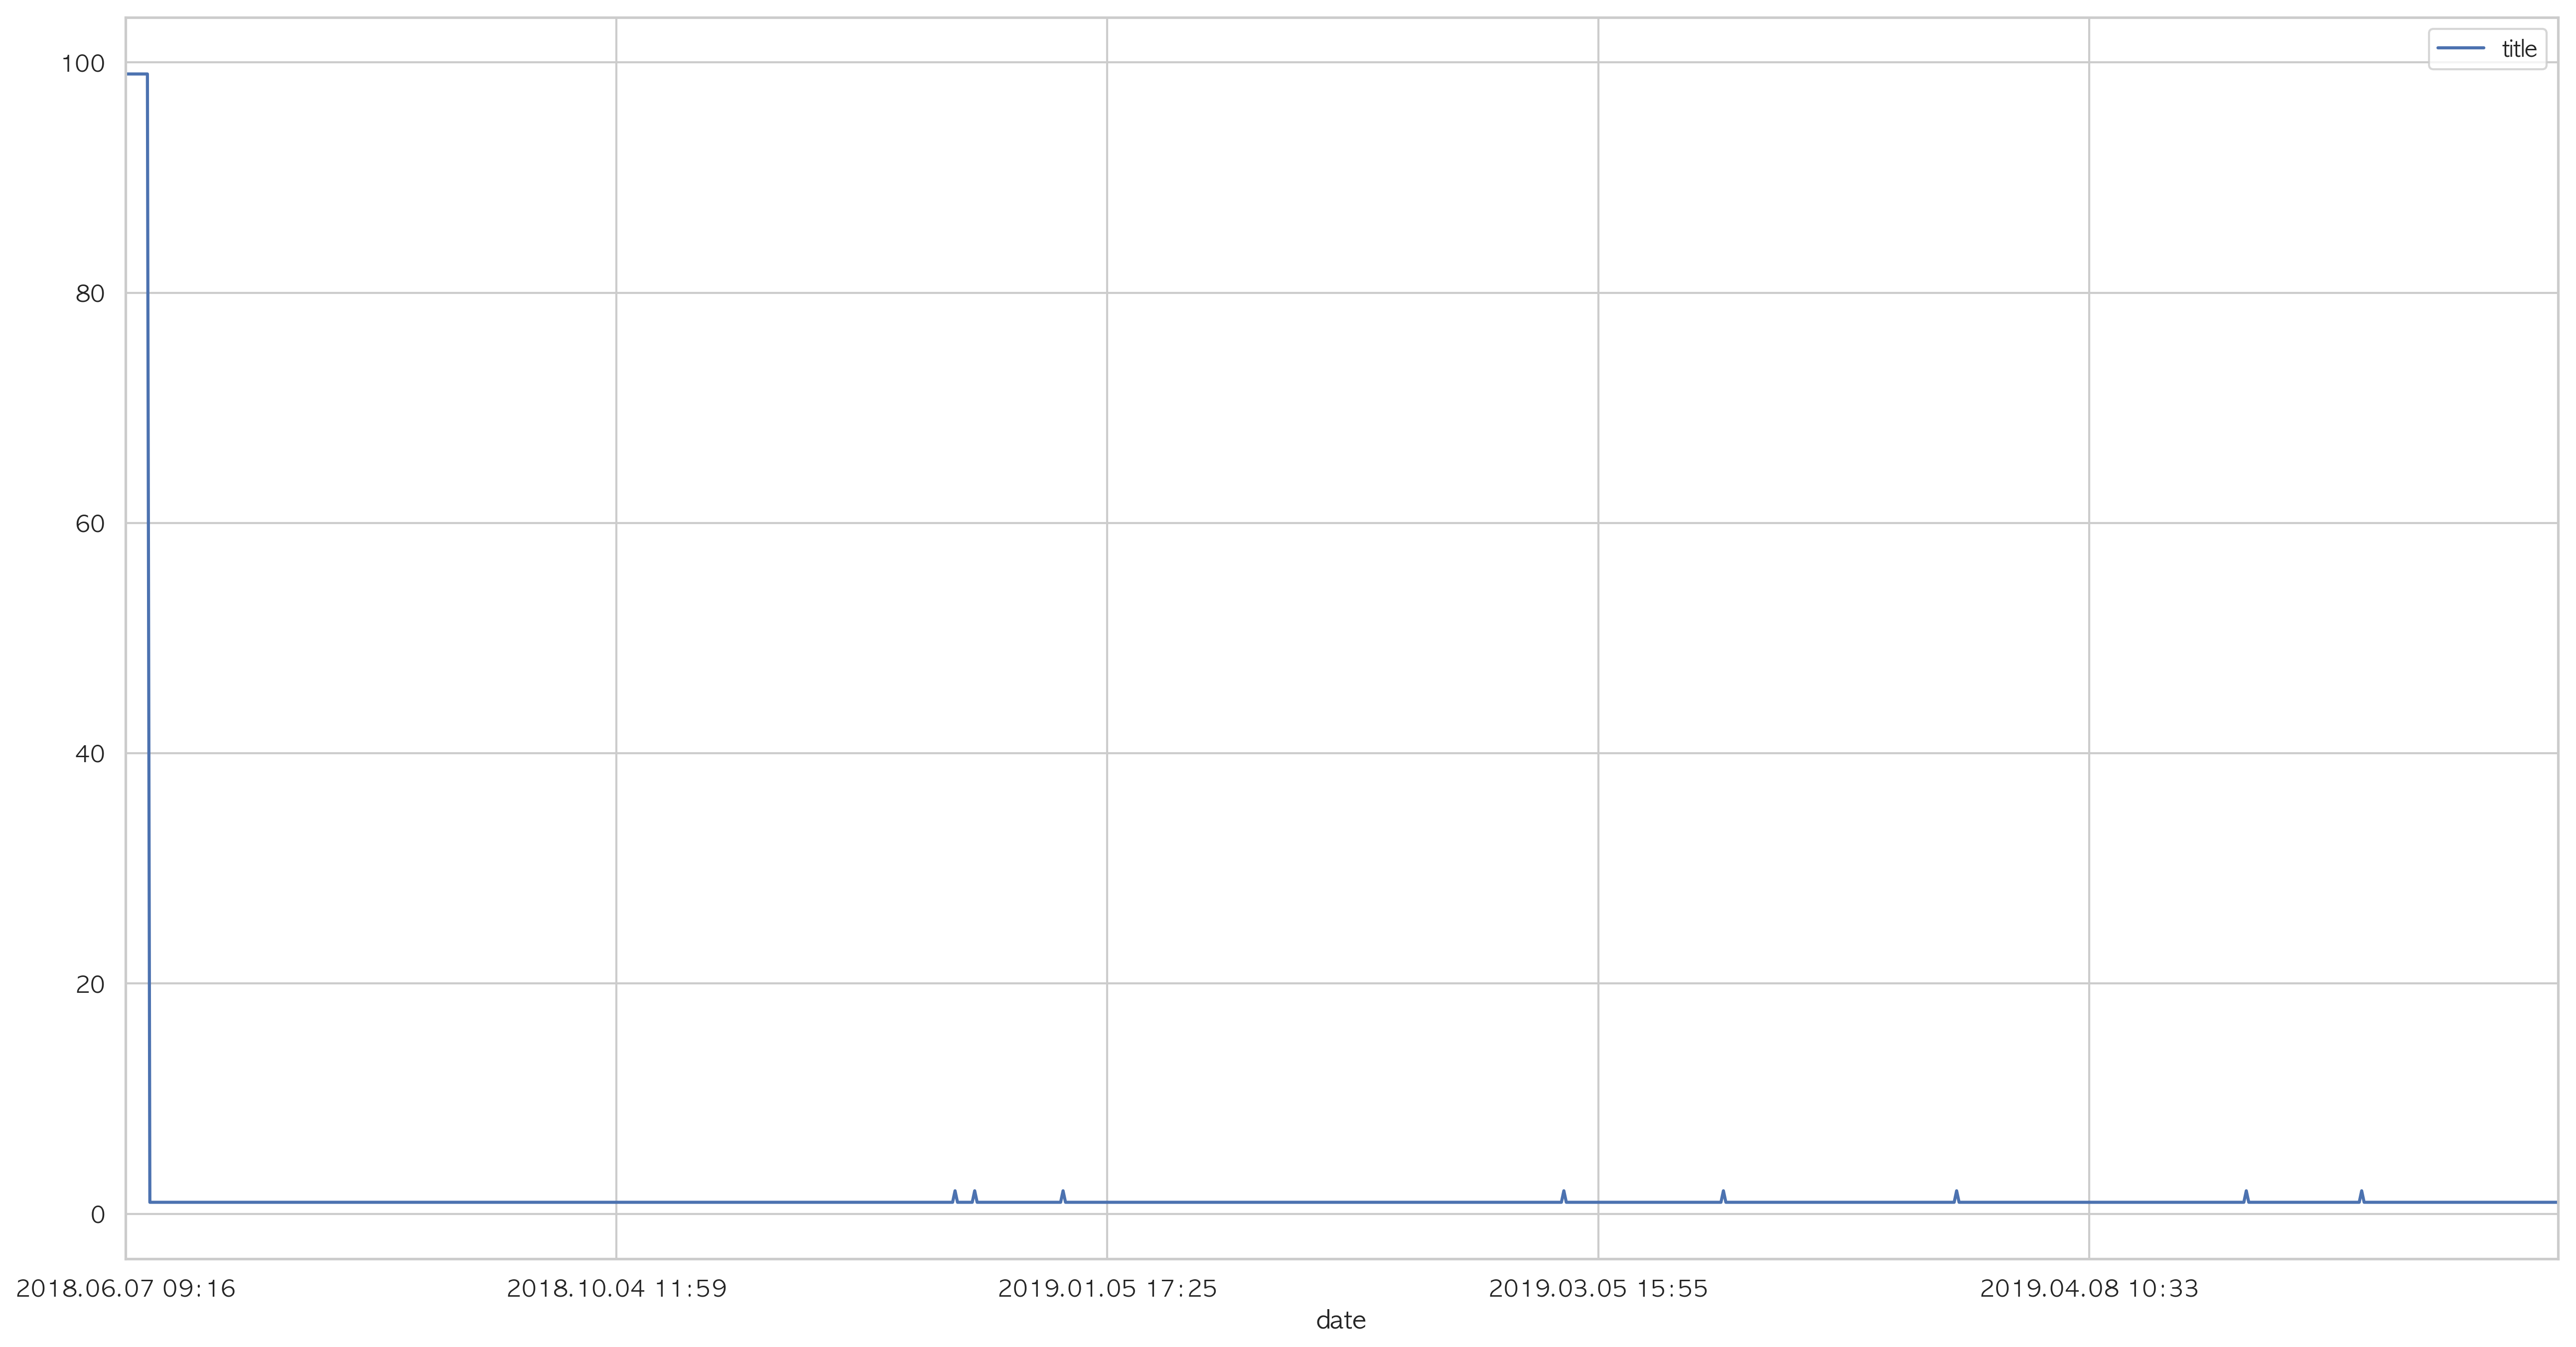

In [13]:
fig, ax = plt.subplots(1,1,figsize=(21, 11))
sla.groupby(by='date').count().plot(y="title", ax=ax)